In [13]:
import pandas as pd
import matplotlib.pyplot as plt

print("✅ Libraries loaded successfully!")


✅ Libraries loaded successfully!


In [14]:
# Load the single sheet
data = pd.read_excel("data/Tutorial 6 Data WT + ORXKO.xlsx", sheet_name="WT VS ORXKO DATA")

print("✅ Data loaded successfully!")
print("Groups found (raw):", data["Group"].unique())

# Clean up the Group column so it only says "WT" or "ORXKO"
data["Group"] = data["Group"].replace({
    "Data for WT Mice": "WT",
    "ORXKO FILES COLLECTION": "ORXKO"
})

print("\n✅ Cleaned groups:", data["Group"].unique())
display(data.head())


✅ Data loaded successfully!
Groups found (raw): ['Data for WT Mice' 'ORXKO FILES COLLECTION']

✅ Cleaned groups: ['WT' 'ORXKO']


,Group,Mouse,AW,QW,NREM,REM,Bouts_AW,Bouts_QW,Bouts_NREM,Bouts_REM,...,ENTROPY_NREM,ENTROPY_REM,EMG_ENTROPY_AW,EMG_ENTROPY_QW,EMG_ENTROPY_NREM,EMG_ENTROPY_REM,EMG_TWITCH_AW,EMG_TWITCH_QW,EMG_TWITCH_NREM,EMG_TWITCH_REM
0,WT,503 WT,20.925926,5.879630,61.342593,11.851852,36,74,73,18,...,-1.256535,0.757991,-0.337946,0.378630,0.120275,-0.213667,2.281811,-0.389278,-0.617051,-0.641984
1,WT,504 WT,32.372093,7.906977,54.139535,5.581395,59,92,75,8,...,-1.542891,-0.263649,-1.085955,0.696347,0.734383,-1.811466,1.237197,-0.512871,-0.601787,-0.611843
2,WT,506 WT,20.694444,6.111111,61.666667,11.527778,33,74,74,16,...,-1.263712,0.786932,-0.348181,0.363633,0.121029,-0.215153,2.325416,-0.326588,-0.626421,-0.650434
3,WT,524 WT,35.416667,6.574074,52.222222,5.787037,33,69,50,7,...,-1.809570,-0.214227,-0.423973,0.357864,0.333842,-0.824407,0.692910,-0.193557,-0.400939,-0.402657
4,WT,342 WT,6.509695,6.786704,74.007387,12.696214,27,49,65,23,...,-0.141695,-0.381064,-0.222688,-0.035794,0.066364,-0.253528,3.343559,-0.664441,-0.077234,-0.908956


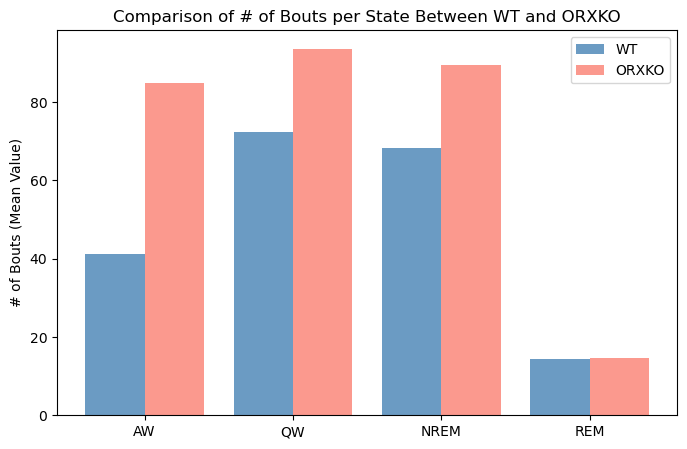

In [20]:
bouts = ["Bouts_AW", "Bouts_QW", "Bouts_NREM", "Bouts_REM"]
wt_means = data[data["Group"]=="WT"][bouts].mean()
orxko_means = data[data["Group"]=="ORXKO"][bouts].mean()

plt.figure(figsize=(8,5))
x = range(len(bouts))
plt.bar([i - 0.2 for i in x], wt_means, width=0.4, label="WT", color="steelblue", alpha=0.8)
plt.bar([i + 0.2 for i in x], orxko_means, width=0.4, label="ORXKO", color="salmon", alpha=0.8)
plt.xticks(x, ["AW","QW","NREM","REM"])
plt.ylabel("# of Bouts (Mean Value)")
plt.title("Comparison of # of Bouts per State Between WT and ORXKO")
plt.legend()
plt.show()
